Question 1 : What are Type I and Type II errors in hypothesis testing, and how do they impact decision-making?  
- Type I error is rejecting the null hypothesis when it is actually True.
- Type II error is failing to reject the null hypothesis when it is actually False.
  
  - **Impact on dicision making :**  
- Rejecting a true null hypothesis can lead to implementing a new product or strategy that is actually ineffective. For example, a medical test incorrectly identifies a healthy person as having a disease, leading to unnecessary treatment and anxiety.
- Failing to reject a false null hypothesis can mean missing an important opportunity. For instance, a quality control test might incorrectly pass a defective product, leading to customer complaints or safety issues.
- The choice of which error is more critical depends on the context and can influence the decision-making process.
  - A larger sample size can help decrease the probability of both types of errors simultaneously.
  - Adjusting the significance level ($\alpha$) can be used to consciously increase or decrease the risk of a Type I error.

Question 2 : What is the P-value in hypothesis testing, and how should it be interpreted in the context of the null hypothesis?  
- The p-value is the probability value, calculated form a statistical test. p-value in hypothesis testing is used to decide whether to reject a null hypothesis or not.
- To interpret it, we compare the p-value to a significance level ($\alpha$), typically (0.05). If the p-value is less than significance level, we reject the null hypothesis, or if it's greater than or equal to significance level, we fail to reject null hypothesis.

Question 3 : Explain the difference between a Z-test and a T-test, including when to use each.  
- Z-test uses z distribution, while T-test Uses the T-distribution, which is more spread out than the Z-distribution, especially for small sample sizes.
- In Z-test the test statistic is calculated using the population standard deviation, while In T-test the test statistic is calculated using the sample standard deviation.
- T-test requires calculating degree of freedom (df), which is typically n-1 for a one-sample test.
    - **when to use each :** A Z-test is used when the population standard deviation is known and the sample size is large (n>30), while a T-test is used when the population standard deviation is unknown and the sample size is small (n<=30). Both tests are used for hypothesis testing, but a Z-test uses the standard normal (Z) distribution and a T-test uses the T-distribution.

Question 4 : What is a confidence interval, and how does the margin of error influence its width and interpretation?  
- A confidence interval is a statistical range of values that is likely to contain the true value of an unknown population parameter (such as a population mean or proportion) with a certain level of confidence.  
- The calculation of a confidence interval typically involves a point estimate (e.g. sample mean) plus or minus a margin of error:

    `confidance interval = point estimate +- margin of error`
- The margin of error has a direct influence on the confidence interval's width and interpretation in the following ways :  
    - **Influence on the width :**

    - The width of the confidence interval is exactly twice the margin of error. As the margin of error increases, the interval becomes wider, and as the margin of error decreases, the interval becomes narrower.
    - A narrower confidence interval (smaller margin of error) indicates greater precision in the estimate of the population parameter. A wider interval (larger margin of error) indicates less precision.

    - **Influence on the Interpretation :**
    - The margin of error helps define the range within which the true parameter is likely to fall. For example, a 95% confidence interval with a margin of error of 3 units means we are 95% confident that the true population value is within 3 units of our sample estimate.
    - To be more confident (e.g., 99%), one must accept a larger margin of error and thus a less precise (wider) interval. Conversely, a highly precise estimate (small margin of error) means accepting a lower level of confidence.

Question 5 : Describe the purpose and assumptions of an ANOVA test. How does it extend hypothesis testing to more than two groups?
- The purpose of an ANOVA test is to determine if there are any statistically significant differences between the means of three or more independent groups by comparing the variation between the groups to the variation within the groups. It extends hypothesis testing beyond two groups to prevent inflating the risk of a Type I error that would occur with multiple t-tests.
- **Assumptions of ANOVA :**
    - The data from each group is approximately normally distributed.
    - The samples are randomly and independently selected from their populations.
    - The variance within each group is similar across all groups. This is also known as homoscedasticity.
    - Absence of outliers.

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [11]:
# Que 6. Write a Python program to perform a one-sample Z-test and interpret the result for a given dataset.


population = np.random.randn(100)
np.mean(population), np.std(population)

null_mean = 0.9 #Frame the hypothesis

from statsmodels.stats.weightstats import ztest
zscore, pvalue = ztest(population, value = null_mean, alternative = 'smaller')

if pvalue <= 0.05: # Interpreting the result
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Reject the null hypothesis


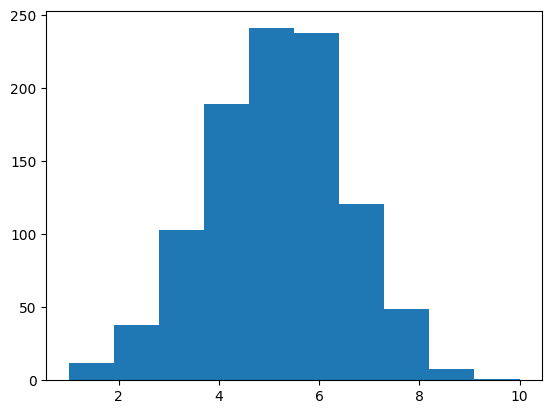

In [15]:
# Que 7. Simulate a dataset from a binomial distribution (n = 10, p = 0.5) using NumPy and plot the histogram.


b = np.random.binomial(n = 10, p = 0.5, size = 1000)
plt.hist(b)
plt.show()

<Axes: ylabel='Density'>

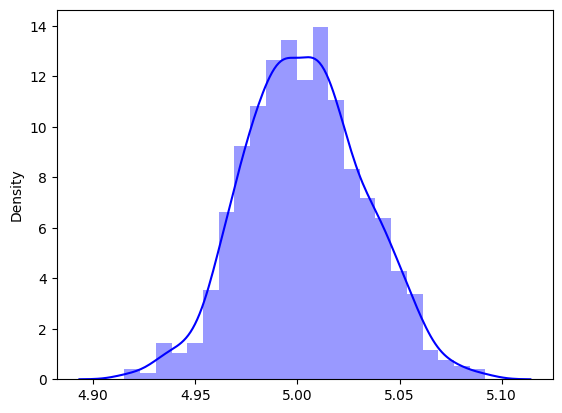

In [22]:
# Que 8. Generate multiple samples from a non-normal distribution and implement the Central Limit Theorem using Python.

population = np.random.binomial(10, 0.5, 100000)

sample_size = int(len(population)*0.030)

mean_of_samples = []

for i in range(1, 1000):
    sample = np.random.choice(population, size = sample_size)
    mean_of_samples.append(np.mean(sample))

sns.distplot(mean_of_samples, kde = True, color = 'blue')

Sample Mean: 9.5738
Confidence Interval (95%): (8.5506, 10.5971)


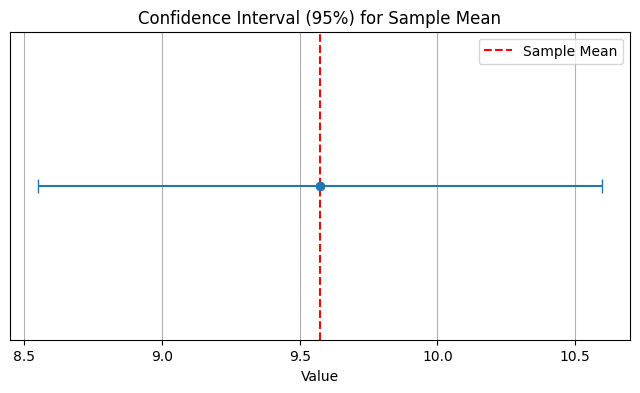

In [25]:
# Que 9. Write a Python function to calculate and visualize the confidence interval for a sample mean.

import scipy.stats as stats

def plot_confidence_interval(sample, alpha=0.05):
    n = len(sample)
    mean = np.mean(sample)
    std_err = stats.sem(sample)

    t_crit = stats.t.ppf(1 - alpha/2, n - 1)
    margin_of_error = t_crit * std_err
    confidence_interval = (mean - margin_of_error, mean + margin_of_error)

    print(f"Sample Mean: {mean:.4f}")
    print(f"Confidence Interval ({1-alpha:.0%}): ({confidence_interval[0]:.4f}, {confidence_interval[1]:.4f})")

  # Visualize the confidence interval
    plt.figure(figsize=(8, 4))
    plt.errorbar(mean, 0, xerr=margin_of_error, fmt='o', capsize=5)
    plt.axvline(mean, color='red', linestyle='--', label='Sample Mean')
    plt.title(f"Confidence Interval ({1-alpha:.0%}) for Sample Mean")
    plt.yticks([]) # Hide y-axis
    plt.xlabel("Value")
    plt.legend()
    plt.grid(axis='x')
    plt.show()

sample_data = np.random.normal(loc=10, scale=5, size=100)
plot_confidence_interval(sample_data)

In [35]:
# Que 10. Perform a Chi-square goodness-of-fit test using Python to compare observed and expected distributions, and explain the outcome.

data = sns.load_dataset('tips')
data_table = pd.crosstab(data['sex'], data['smoker'])
obsserved_values = data_table.values

import scipy.stats as stats
stats_test, p, dof, expected_values = stats.chi2_contingency(obsserved_values)
alpha = 0.05

from scipy.stats import chi2

chi2_test = sum([(o-e)**2/e for o, e in zip(obsserved_values, expected_values)])

chi2_stats = chi2_test[0] + chi2_test[1]
chi2_critical = chi2.ppf(1-alpha, dof)

if chi2_stats >= chi2_critical:
    print("Reject the null hypothesis, there is relationship between two catagorical variables")
else:
    print("Fail to reject the null hypothesis, there is no relationship")

Fail to reject the null hypothesis, there is no relationship
